In [46]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [48]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# Display basic information about the dataset
print(df.info())
print(df.describe())
# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.6

In [55]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Label encoding for categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Normalization using MinMaxScaler for numerical columns
scaler = MinMaxScaler()
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])


In [56]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,4,0.446077,0.659574,0.272727,0
1,0,0.674675,0,0,0,0.508669,0.659574,0.000000,0
2,1,0.349349,0,0,4,0.508669,0.468085,0.354545,0
3,0,0.449449,0,0,1,0.394946,0.319149,0.340909,0
4,1,0.949950,1,1,1,0.297679,0.276596,0.340909,0
...,...,...,...,...,...,...,...,...,...
99995,0,1.000000,0,0,0,0.508669,0.574468,0.045455,0
99996,0,0.024024,0,0,0,0.216280,0.638298,0.090909,0
99997,1,0.824825,0,0,3,0.523656,0.468085,0.340909,0
99998,0,0.299299,0,0,4,0.746694,0.106383,0.090909,0


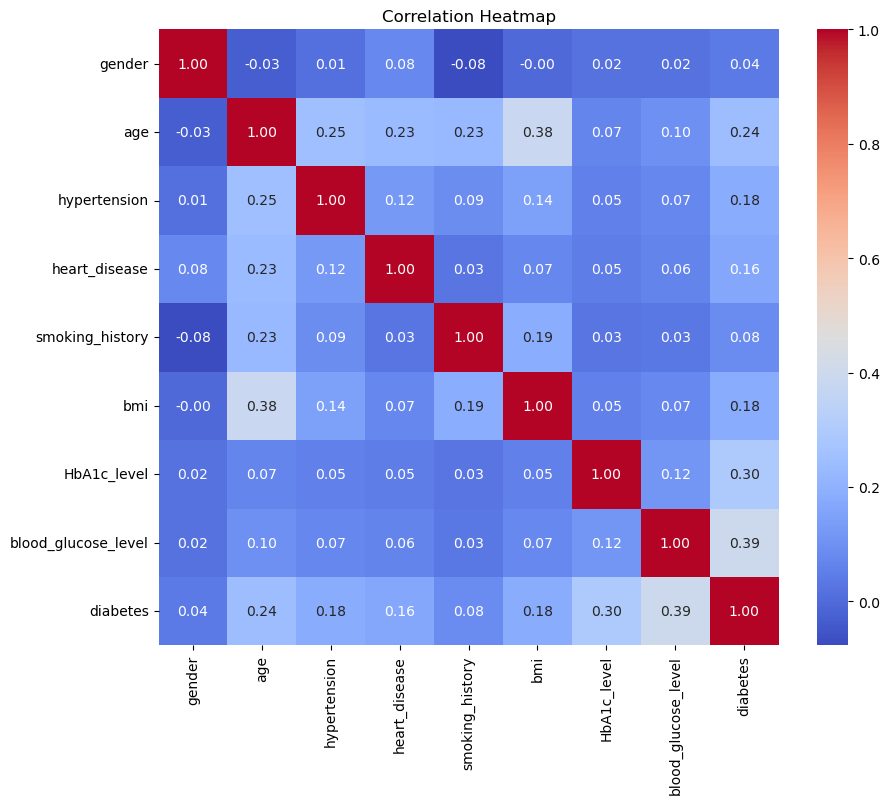

In [57]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

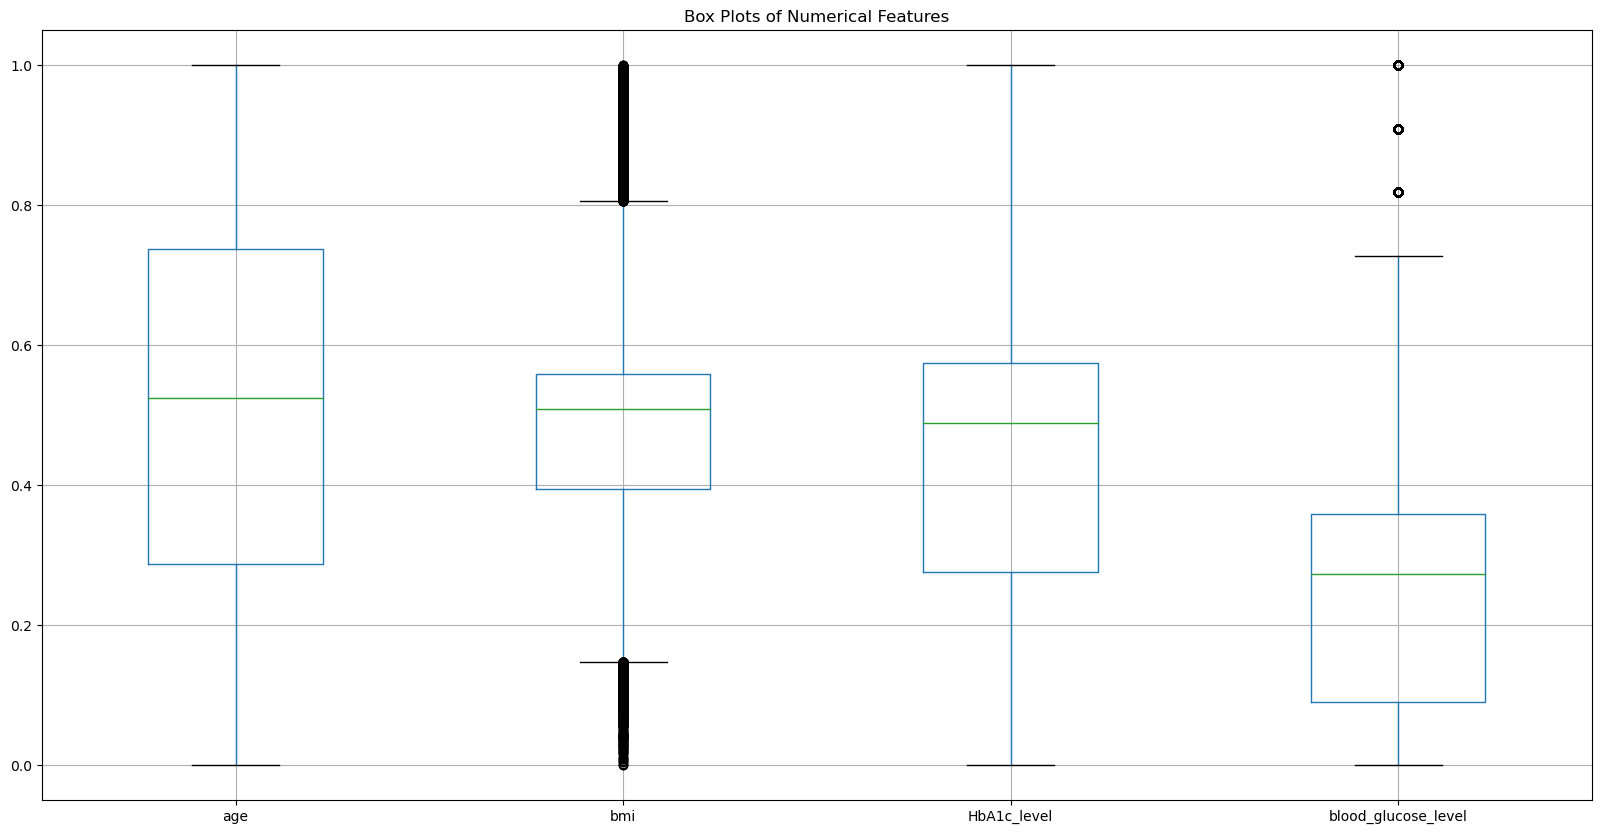

In [58]:
# Box plots for each feature
plt.figure(figsize=(20, 10))
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].boxplot()
plt.title('Box Plots of Numerical Features')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


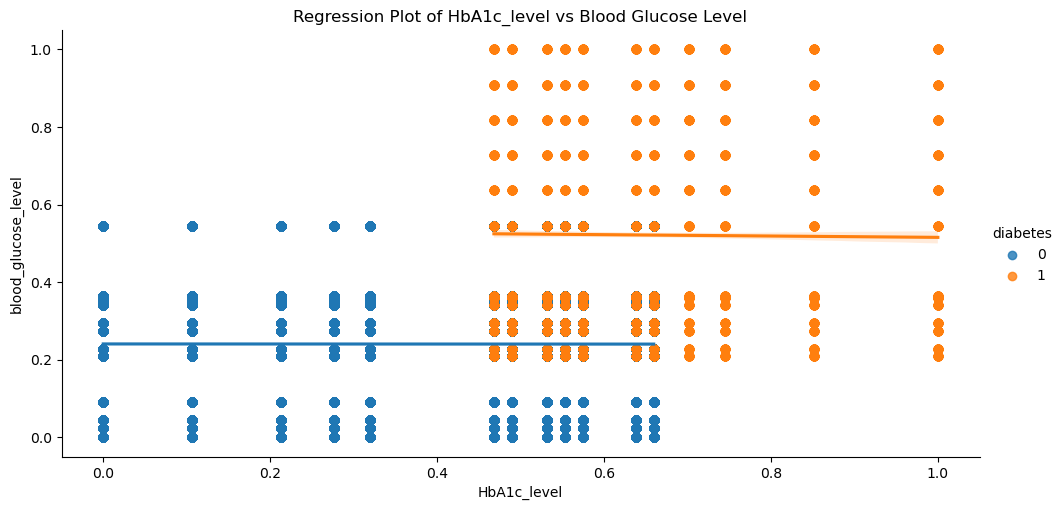

In [59]:
# Regression plot for HbA1c_level vs blood_glucose_level
sns.lmplot(x='HbA1c_level', y='blood_glucose_level', hue='diabetes', data=df, aspect=2)
plt.title('Regression Plot of HbA1c_level vs Blood Glucose Level')
plt.show()

In [29]:
from scipy.stats import pearsonr

In [30]:
# Calculate Pearson correlation coefficient and p-value between 'age' and 'bmi'
corr_coef, p_value = pearsonr(df['age'], df['bmi'])

print(f"Pearson correlation coefficient between age and bmi: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient between age and bmi: 0.33739577618617433
P-value: 0.0


In [31]:
# Calculate Pearson correlation coefficient and p-value between 'hypertension' and 'diabetes'
corr_coef, p_value = pearsonr(df['hypertension'], df['diabetes'])

print(f"Pearson correlation coefficient between age and bmi: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient between age and bmi: 0.1978232464080474
P-value: 0.0


In [32]:
# Calculate Pearson correlation coefficient and p-value between 'blood_glucose_level' and 'diabetes'
corr_coef, p_value = pearsonr(df['blood_glucose_level'], df['diabetes'])

print(f"Pearson correlation coefficient between age and bmi: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient between age and bmi: 0.4195579960205509
P-value: 0.0


In [37]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values for numerical columns (assuming here we use mean imputation)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['HbA1c_level'].fillna(df['HbA1c_level'].mean(), inplace=True)
df['blood_glucose_level'].fillna(df['blood_glucose_level'].mean(), inplace=True)

# Impute missing values for categorical columns (if any)
# Example: df['smoking_history'].fillna(df['smoking_history'].mode()[0], inplace=True)


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Shape of dataframe after outlier removal: (96474, 9)


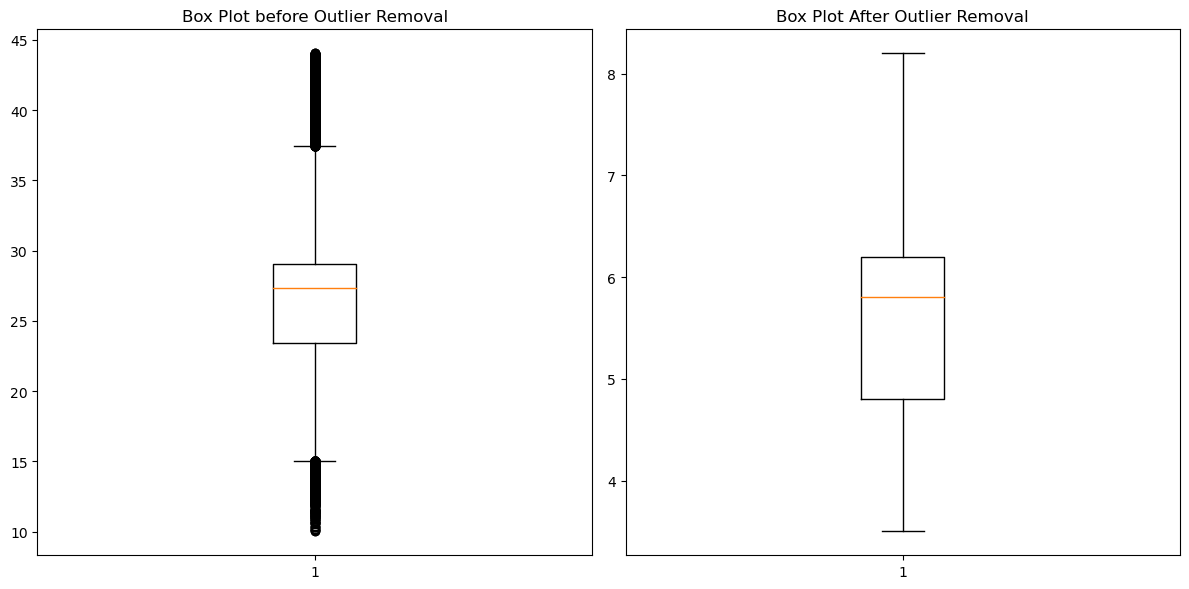

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is already loaded and processed up to outlier removal

# Example of outlier removal using z-score method for 'bmi' and 'HbA1c_level' columns
z_scores = stats.zscore(df[['bmi', 'HbA1c_level']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Selecting entries within 3 standard deviations for both columns
df = df[filtered_entries]

# Check the shape of the dataframe after outlier removal
print("Shape of dataframe after outlier removal:", df.shape)

# Box plot before outlier removal
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df[['bmi']].values)
plt.title('Box Plot before Outlier Removal')

plt.subplot(1, 2, 2)
plt.boxplot(df[['HbA1c_level']].values)
plt.title('Box Plot After Outlier Removal')

plt.tight_layout()
plt.show()


In [53]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Label encoding for categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Normalization using MinMaxScaler for numerical columns
scaler = MinMaxScaler()
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])


In [54]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,4,0.446077,0.659574,0.272727,0
1,0,0.674675,0,0,0,0.508669,0.659574,0.000000,0
2,1,0.349349,0,0,4,0.508669,0.468085,0.354545,0
3,0,0.449449,0,0,1,0.394946,0.319149,0.340909,0
4,1,0.949950,1,1,1,0.297679,0.276596,0.340909,0
...,...,...,...,...,...,...,...,...,...
99995,0,1.000000,0,0,0,0.508669,0.574468,0.045455,0
99996,0,0.024024,0,0,0,0.216280,0.638298,0.090909,0
99997,1,0.824825,0,0,3,0.523656,0.468085,0.340909,0
99998,0,0.299299,0,0,4,0.746694,0.106383,0.090909,0


In [60]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,4,0.446077,0.659574,0.272727,0
1,0,0.674675,0,0,0,0.508669,0.659574,0.000000,0
2,1,0.349349,0,0,4,0.508669,0.468085,0.354545,0
3,0,0.449449,0,0,1,0.394946,0.319149,0.340909,0
4,1,0.949950,1,1,1,0.297679,0.276596,0.340909,0


In [61]:
df = pd.get_dummies(df, columns = ['gender', 'smoking_history'], drop_first = True, dtype = 'int')
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_1,gender_2,smoking_history_1,smoking_history_2,smoking_history_3,smoking_history_4,smoking_history_5
0,1.000000,0,1,0.446077,0.659574,0.272727,0,0,0,0,0,0,1,0
1,0.674675,0,0,0.508669,0.659574,0.000000,0,0,0,0,0,0,0,0
2,0.349349,0,0,0.508669,0.468085,0.354545,0,1,0,0,0,0,1,0
3,0.449449,0,0,0.394946,0.319149,0.340909,0,0,0,1,0,0,0,0
4,0.949950,1,1,0.297679,0.276596,0.340909,0,1,0,1,0,0,0,0


In [62]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
X = df.drop("diabetes", axis = 1)
y = df['diabetes']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [65]:
X_train.shape, X_test.shape

((67531, 13), (28943, 13))

In [78]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn import metrics

In [83]:
#creating a simple linear regression model
X = df['HbA1c_level'].values.reshape(-1,1)
y = df['blood_glucose_level']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)
print("intercept (b): ", model.intercept_)
print("coef (m): ", model.coef_)
print("RScore. (r) ", model.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

intercept (b):  0.21845393447551573
coef (m):  [0.0995928]
RScore. (r)  0.012678912323270008
MAE: 0.13825588737858888


Analysis
m: The linear regression model shows that for every 1 millimoles per liter increase in the HbA1c level, there is around a 6.252 millimoles per liter increase in the blood glucose level. b: A person with a HbA1C level of 0 is predicted to have a blood glucose level of 103.223 MAE: there is around a 30 millimoles per liter difference from the prediction of the blood glucose level to the actual value. This is a very large error given that the blood glucose level ranges from a scale of 80 to 300, which is around a 10 to 40 percent error. R Score: The r score value is 0.02, in which 0 is extremely inaccurate and 1 is perfectly accurate. This small value further confirms that the prediction is fairly innacurate in predicting a person's blood glucose level given their HbA1c level.

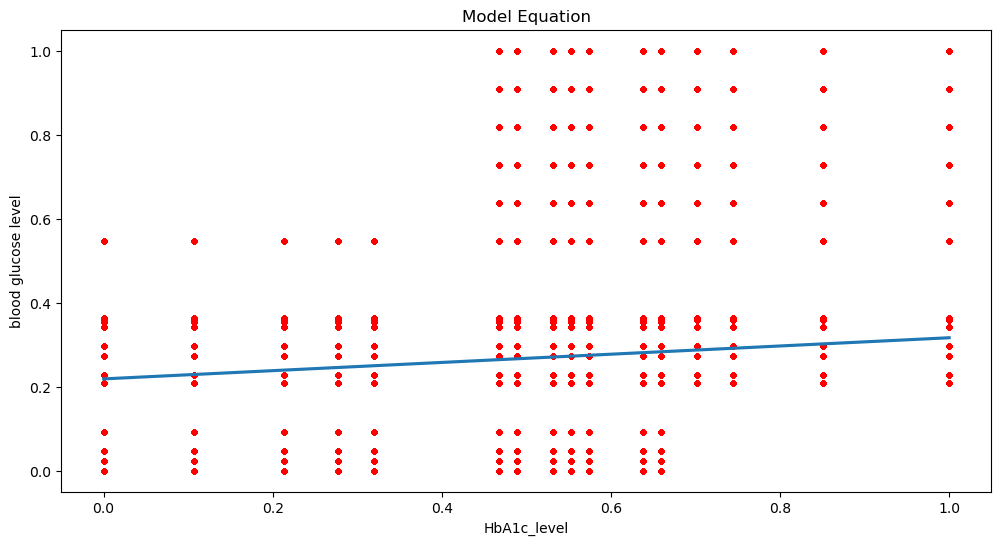

In [84]:
#visualizing data and linear regression
plt.figure(figsize=(12,6))
g = sns.regplot(x=df['HbA1c_level'],y=df["blood_glucose_level"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("blood glucose level")
g.set_xlabel('HbA1c_level')
plt.show()

In [85]:
#creating a multi-dimension linear regression model
X = df[['HbA1c_level','blood_glucose_level','bmi','age']]
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)
print("intercept (b): ", model.intercept_)
print("coef (m): ", model.coef_)
print("RScore. (r) ", model.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

intercept (b):  -0.31667871853037516
coef (m):  [0.28908337 0.48812976 0.12897748 0.14172496]
RScore. (r)  0.252941290365045
MAE: 0.13764432240677832


Analysis¶
At least one multiple (3+ dimensional) linear regression model with an explanation of the coefficients, intercept, MAE, and RScore in context. Note that this means your data must have at least 3 columns of quantitative values! b: the b value shows that when bmi, HbA1c level, blood glucose level, and age are all 0, then the value of diabetes is around -0.90. This is nonsensical because this means a person has no weight, no blood sugar, and have no age, which is not realistic or useful, therefore giving an impossible diabetes level that is negative on a 0 to 1 scale. m: this value shows that if the HbA1c level increases by 1, the diabetes level changes by around 0.08; if the blood glucose level changes by 1, the diabetes level changes by around 0.002; if the bmi changes by 1, the diabetes level changes by around 0.004; if the age changes by 1, the diabetes level changes by around 0.001. This means that a change in the HbA1c level has the greatest impact, while a change in the age has the least impact. MAE: A MAE of 0.157 on a 0 to 1 scale is fairly small. This means it is fairly accurate in predicting diabetes and has some but not a significant amount of error. This model can possibly be used to guide medical decisions but may not be completely trusted. R Score: An R Score of 0.337 (which is smaller than 0.5) implies that the model is more inaccurate than accurate. However, it is higher than the previous two-dimension model, possibly due to an increased amount of dimensions and decision factors.

In [92]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("diabetes", axis=1),df["diabetes"], test_size=0.3)


In [93]:
classifier = xgb.XGBClassifier()

In [94]:
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
print('Training accuracy {:.4f}'.format(classifier.score(X_train,Y_train)))
print('Testing accuracy {:.4f}'.format(classifier.score(X_test,Y_test)))

Training accuracy 0.9774
Testing accuracy 0.9714


In [97]:
input_data = (1,89,66,23,94,28.1,0.167,21,10,13,23,67,12)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


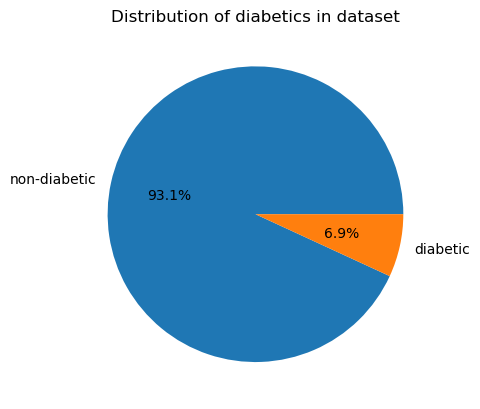

In [98]:
plt.pie(df['diabetes'].value_counts(), labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [102]:
from sklearn import tree

In [103]:
model = tree.DecisionTreeClassifier()

In [105]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

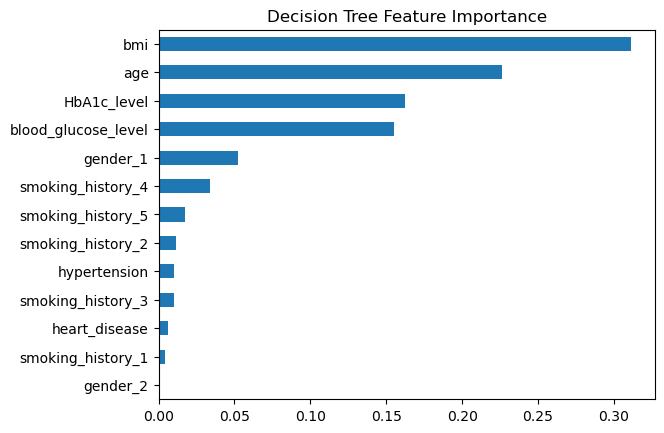

In [107]:
feature_importances = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values()
feature_importances.plot.barh();
plt.title('Decision Tree Feature Importance');

In [108]:
y_pred_test = model.predict(X_test)
y_pred_train= model.predict(X_train)

In [111]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [112]:
train_decision_tree_report = classification_report(y_train, y_pred_train)
print(train_decision_tree_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62842
           1       1.00      0.95      0.97      4689

    accuracy                           1.00     67531
   macro avg       1.00      0.97      0.99     67531
weighted avg       1.00      1.00      1.00     67531



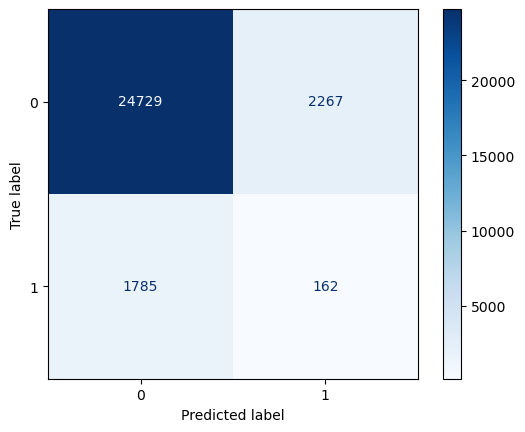

In [114]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_);
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_test, y_true=y_test, display_labels=model.classes_, cmap='Blues');